In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sp
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from scipy.misc import derivative
import scipy.integrate as intg
import scipy as sp

### Now we train another neural network for z and $D_L(z)$

In [2]:
file = '../data/jla_binned_distances_31nodes_v1.txt'

# filefull = '/home/cosmocicatais/Documents/github/neuralCosmoReconstruction/data/jla_lcparams.txt'
syscov = np.loadtxt('../data/cov_jla_binned_distances_31nodes_v1.txt',skiprows=1).reshape((31,31))
# syscov = np.loadtxt('../data/jla_v0_covmatrix.dat',skiprows=1).reshape((740,740))
# data = pd.read_csv(file2, names=['z', '$D_L$'], sep = " ", skiprows=3)
# data = np.loadtxt(file, usecols=[1,4], skiprows=1)
data = np.loadtxt(file, skiprows=3)
nsize = len(syscov)
# print(data.head(31))
# data.head(31) 
# plt.savefig("DistbinnedJLA.png")
np.shape(syscov)
errors = np.diag(syscov).reshape(nsize,1)
np.shape(errors)
len(data), len(errors)

(31, 31)

In [3]:
# shuffle = [x for x in range(len(data)) if x%2 == 0]
# comp = [x for x in range(len(data)) if x%2 ==1]
# shuffle.extend(comp)

shuffle = [0,1,2,3,4,5,6,7,8,30,28,26,24,22,20,9,10,12,14,16,18,29,27,25,23,21,19,17,15,13,11]
data = data[shuffle]

errors= errors[shuffle]
len(data), len(errors), len(shuffle)

(31, 31, 31)

In [4]:
dl = data[:,1]
z = data[:,0]
np.shape(z), np.shape(dl), np.shape(errors), len(data)

((31,), (31,), (31, 1), 31)

In [5]:
split = 0.8
ntrain = int(split * len(z))
indx = [ntrain]

# scalerz = StandardScaler()
# scalerz.fit(z.reshape(-1, 1))
# zz = scalerz.transform(z.reshape((-1,1)))

scalerdl = StandardScaler()
scalerdl.fit(dl.reshape(-1, 1))
dll = scalerdl.transform(dl.reshape((-1,1)))

# scalererr = StandardScaler()
# scalererr.fit(errors.reshape(-1, 1))
# errscl = scalererr.transform(errors.reshape((-1,1)))

z_train, z_test = np.split(z, indx)
y = np.concatenate((dll, errors), axis=1)
y_train, y_test = np.split(y, indx)

In [6]:
def model(input_z):
    efirst = Dense(100, activation='relu', input_shape=(1,))(input_z)
    x = Dense(100, activation='relu')(efirst)
    x = Dense(100, activation='relu')(x)
    x = Dense(50, activation='relu')(x)
#     x = Dense(50, activation='relu')(x)
#     x = Dense(100, activation='relu')(x)
#     x = Dense(30, activation='relu')(x)
#     x = Dense(10, activation='relu')(x)
    elast = Dense(2,activation='linear')(x)
    return elast

batch_size = 1
epochs = 1000
# epochs = 500
input_z = Input(shape = (1,))
neural_model = Model(input_z, model(input_z))
neural_model.compile(loss='mean_squared_error', optimizer = "adam")
neural_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 100)               200       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 102       
Total params: 25,552
Trainable params: 25,552
Non-trainable params: 0
_________________________________________________________

In [7]:
model_train = neural_model.fit(z_train, y_train, batch_size=batch_size,
                                    epochs=epochs,verbose=1,
                                    validation_data=(z_test, y_test))
#                                     callbacks=callbacks)

Epoch 1/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.6138 - val_loss: 0.0712
Epoch 2/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.3842 - val_loss: 0.0242
Epoch 3/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2624 - val_loss: 0.0204
Epoch 4/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2468 - val_loss: 0.0088
Epoch 5/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0468 - val_loss: 0.1279
Epoch 6/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0640 - val_loss: 0.0091
Epoch 7/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0408 - val_loss: 0.0065
Epoch 8/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0444 - val_loss: 0.0176
Epoch 9/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0180 - val_loss: 0.0089
Epoch 10/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0160 - val_loss: 0.035

24/24 [==============================] - 0s 1ms/step - loss: 0.0078 - val_loss: 8.8984e-04
Epoch 82/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0045 - val_loss: 0.0014
Epoch 83/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 3.7374e-04
Epoch 84/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0036 - val_loss: 0.0017
Epoch 85/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0019 - val_loss: 7.3997e-04
Epoch 86/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 1.4085e-04
Epoch 87/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0100 - val_loss: 0.0021
Epoch 88/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 3.6486e-04
Epoch 89/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0067 - val_loss: 0.0050
Epoch 90/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0054 - v

Epoch 160/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 2.4064e-04
Epoch 161/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0099
Epoch 162/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0080 - val_loss: 0.0057
Epoch 163/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0085 - val_loss: 0.0012
Epoch 164/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0060 - val_loss: 6.2338e-04
Epoch 165/1000
24/24 [==============================] - 0s 1ms/step - loss: 9.4261e-04 - val_loss: 9.2174e-04
Epoch 166/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 3.6361e-04
Epoch 167/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 2.3264e-04
Epoch 168/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 7.3024e-04
Epoch 169/1000
24/24 [==============================] 

24/24 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 9.8819e-05
Epoch 239/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0065 - val_loss: 0.0010
Epoch 240/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 241/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0032
Epoch 242/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0049 - val_loss: 0.0011
Epoch 243/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0032 - val_loss: 0.0014
Epoch 244/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 245/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 9.1510e-04
Epoch 246/1000
24/24 [==============================] - 0s 1ms/step - loss: 9.2043e-04 - val_loss: 3.6205e-04
Epoch 247/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.001

24/24 [==============================] - 0s 1ms/step - loss: 9.7368e-04 - val_loss: 3.2908e-04
Epoch 317/1000
24/24 [==============================] - 0s 1ms/step - loss: 7.7253e-04 - val_loss: 1.0935e-04
Epoch 318/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 4.8141e-04
Epoch 319/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 3.5690e-04
Epoch 320/1000
24/24 [==============================] - 0s 1ms/step - loss: 9.9630e-04 - val_loss: 5.8308e-04
Epoch 321/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0039 - val_loss: 0.0014
Epoch 322/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0032 - val_loss: 1.9054e-04
Epoch 323/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss: 2.3390e-04
Epoch 324/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 4.7097e-04
Epoch 325/1000
24/24 [==============================]

24/24 [==============================] - 0s 1ms/step - loss: 0.0030 - val_loss: 4.4957e-04
Epoch 394/1000
24/24 [==============================] - 0s 1ms/step - loss: 7.1421e-04 - val_loss: 0.0013
Epoch 395/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 396/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0040 - val_loss: 0.0022
Epoch 397/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0086 - val_loss: 2.6552e-04
Epoch 398/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0035 - val_loss: 3.4793e-04
Epoch 399/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 7.0345e-04
Epoch 400/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 8.4824e-04
Epoch 401/1000
24/24 [==============================] - 0s 1ms/step - loss: 8.0976e-04 - val_loss: 3.1283e-04
Epoch 402/1000
24/24 [==============================] - 0s 1ms/st

Epoch 471/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 6.9402e-04
Epoch 472/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.0051
Epoch 473/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0032 - val_loss: 9.7573e-04
Epoch 474/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 7.7355e-04
Epoch 475/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 9.0454e-04
Epoch 476/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 4.8880e-04
Epoch 477/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 478/1000
24/24 [==============================] - 0s 1ms/step - loss: 7.4743e-04 - val_loss: 5.9063e-04
Epoch 479/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 6.7505e-04
Epoch 480/1000
24/24 [============================

Epoch 549/1000
24/24 [==============================] - 0s 1ms/step - loss: 8.4430e-04 - val_loss: 4.8618e-04
Epoch 550/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 1.8732e-04
Epoch 551/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 2.8958e-04
Epoch 552/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 553/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 3.0834e-04
Epoch 554/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0046 - val_loss: 0.0012
Epoch 555/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0033 - val_loss: 4.2937e-04
Epoch 556/1000
24/24 [==============================] - 0s 1ms/step - loss: 7.2623e-04 - val_loss: 8.0514e-04
Epoch 557/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 6.9876e-04
Epoch 558/1000
24/24 [========================

Epoch 627/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 9.6397e-04
Epoch 628/1000
24/24 [==============================] - 0s 1ms/step - loss: 8.4853e-04 - val_loss: 2.0474e-04
Epoch 629/1000
24/24 [==============================] - 0s 1ms/step - loss: 8.8861e-04 - val_loss: 5.7434e-04
Epoch 630/1000
24/24 [==============================] - 0s 1ms/step - loss: 9.6085e-04 - val_loss: 9.5326e-04
Epoch 631/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.0011
Epoch 632/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 633/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss: 0.0012
Epoch 634/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0021
Epoch 635/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss: 0.0073
Epoch 636/1000
24/24 [==============================] 

24/24 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 2.1158e-04
Epoch 705/1000
24/24 [==============================] - 0s 1ms/step - loss: 4.4807e-04 - val_loss: 3.3625e-04
Epoch 706/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 1.2180e-04
Epoch 707/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 3.0229e-04
Epoch 708/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 1.1828e-04
Epoch 709/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0034 - val_loss: 1.9424e-04
Epoch 710/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 6.5766e-04
Epoch 711/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 3.0855e-04
Epoch 712/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 3.3325e-04
Epoch 713/1000
24/24 [==============================] - 0

24/24 [==============================] - 0s 1ms/step - loss: 8.4670e-04 - val_loss: 1.9113e-04
Epoch 782/1000
24/24 [==============================] - 0s 1ms/step - loss: 9.0448e-04 - val_loss: 7.5950e-04
Epoch 783/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0019 - val_loss: 4.5292e-04
Epoch 784/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 785/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 4.0573e-04
Epoch 786/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 0.0010
Epoch 787/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 788/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0037 - val_loss: 0.0025
Epoch 789/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0035
Epoch 790/1000
24/24 [==============================] - 0s 1ms/step - los

24/24 [==============================] - 0s 1ms/step - loss: 0.0022 - val_loss: 3.0904e-04
Epoch 859/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 6.3800e-04
Epoch 860/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0032 - val_loss: 2.9869e-04
Epoch 861/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 862/1000
24/24 [==============================] - 0s 1ms/step - loss: 8.1534e-04 - val_loss: 5.3037e-04
Epoch 863/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 864/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 0.0010
Epoch 865/1000
24/24 [==============================] - 0s 1ms/step - loss: 8.6107e-04 - val_loss: 9.3715e-04
Epoch 866/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0019 - val_loss: 9.8496e-04
Epoch 867/1000
24/24 [==============================] - 0s 1ms/st

24/24 [==============================] - 0s 1ms/step - loss: 0.0030 - val_loss: 0.0014
Epoch 936/1000
24/24 [==============================] - 0s 1ms/step - loss: 6.6444e-04 - val_loss: 2.8785e-04
Epoch 937/1000
24/24 [==============================] - 0s 1ms/step - loss: 7.9594e-04 - val_loss: 0.0019
Epoch 938/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 9.4008e-04
Epoch 939/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 940/1000
24/24 [==============================] - 0s 1ms/step - loss: 9.1301e-04 - val_loss: 3.4935e-04
Epoch 941/1000
24/24 [==============================] - 0s 1ms/step - loss: 9.0864e-04 - val_loss: 6.0038e-04
Epoch 942/1000
24/24 [==============================] - 0s 1ms/step - loss: 5.7593e-04 - val_loss: 0.0031
Epoch 943/1000
24/24 [==============================] - 0s 1ms/step - loss: 9.9127e-04 - val_loss: 1.7282e-04
Epoch 944/1000
24/24 [==============================]

(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

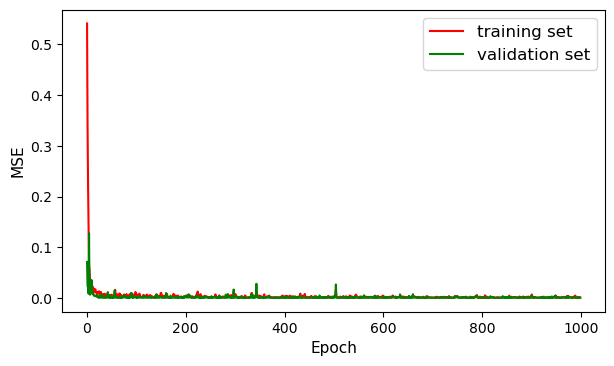

In [8]:
# plt.figure(figsize=(4, 3), dpi=100)
plt.figure(figsize=(7, 4), dpi=100)

plt.plot(model_train.history['loss'], color='r', )
plt.plot(model_train.history['val_loss'], color='g')
plt.ylabel('MSE', fontsize=11)
plt.xlabel('Epoch', fontsize=11)
plt.legend(['training set', 'validation set'], loc='upper right', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# plt.text(160, 500, '300 epochs', fontsize=12)
# plt.title('FFNN', fontsize=8)
# plt.savefig("loss_dlbinnedJla_.png")

In [9]:
unet = np.sqrt(np.min(model_train.history['val_loss']))
model_train.history['loss'][-1], model_train.history['val_loss'][-1], model_train.history['val_loss'][-2]

(0.0008845172706060112, 0.0006565592484548688, 0.0004094261967111379)

In [10]:
# ranz = np.linspace(np.min(z), np.max(z), 31)

# # ranz = np.arange(0.0, 1.5, 0.01)
# ranzz = scalerz.transform(ranz.reshape((-1,1)))

# ranzinv = scalerz.transform(ranz.reshape(-1,1))
# ranzz = ranz
# pred_random = neural_model.predict(ranz)

pred_random = neural_model.predict(z)
# pred_random
dlfake  = scalerdl.inverse_transform(pred_random[:,0].reshape(-1,1))
errfake = pred_random[:,1]                                     
# dlfake = pred_random[:,0]

In [11]:
np.shape(z), np.shape(dlfake), len(z)

((31,), (31, 1), 31)

In [12]:
# index = np.argsort(z)
# z = z[index]

# dlfake = dlfake.reshape(31,)[index]

# fake_data = np.stack((z, dlfake[index]), axis=1)
fake_data = np.stack((z, dlfake.reshape(31,)), axis=1)

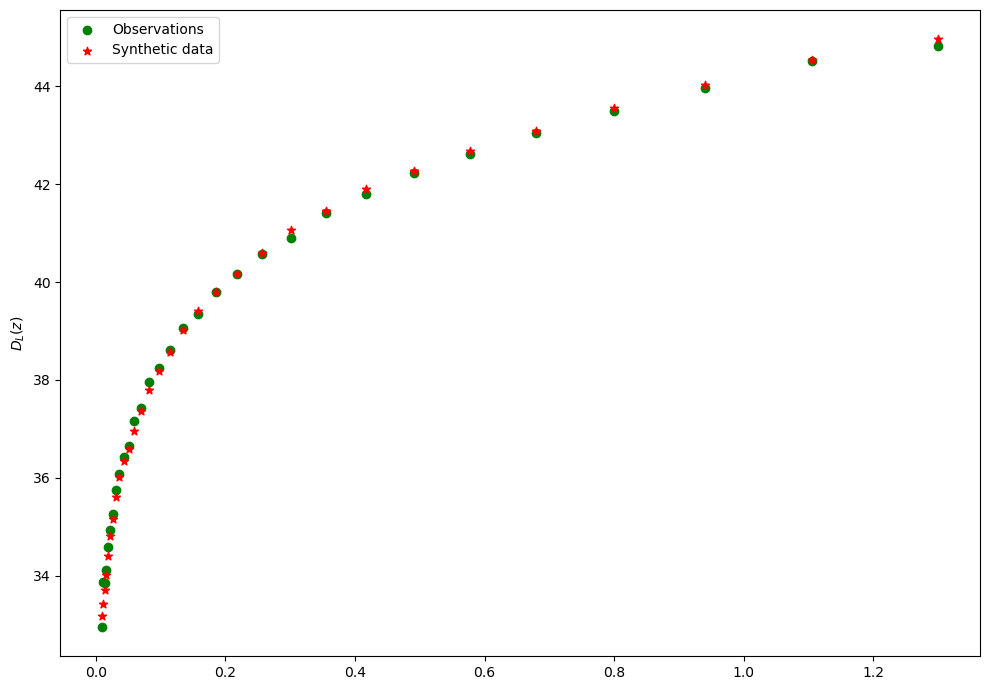

In [13]:
plt.figure(figsize=(10, 7), dpi=100)
plt.scatter(z, dl, c='g', label='Observations')
plt.scatter(z, dlfake, c='r', label='Synthetic data', marker='*')

plt.ylabel("$D_L(z)$")
# plt.xlim(-0.1, np.max(z)+0.2)
plt.tight_layout()
plt.legend()
# plt.savefig('rec_jla_ffnn.png')

In [14]:
np.savetxt("fake_binned_JLA2TEST1.dat",  fake_data, delimiter= " ", header="#fake data\n# z\n# mu", fmt='%1.9f')

In [17]:
neural_model.save('../models/FFNN_JLA2.h5')